In [19]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [8]:
X, y = mglearn.datasets.load_extended_boston()

In [10]:
X.shape

(506, 104)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
# 리지
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

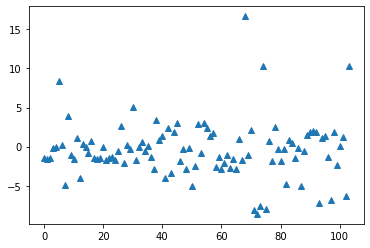

In [25]:
# alpha = 1 일때
plt.plot(ridge.coef_, "^", label = "alpha=1")
plt.show()

In [24]:
ridge.coef_.shape # 104개의 계수들 / 위의 X 갯수가 104개 이므로

(104,)

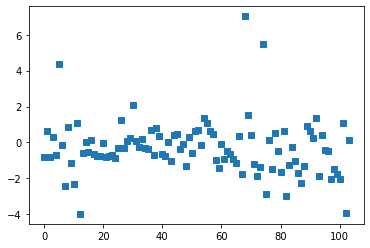

In [36]:
# alpha = 10 일때
plt.plot(ridge10.coef_, "s", label = "alpha=10")
plt.show()

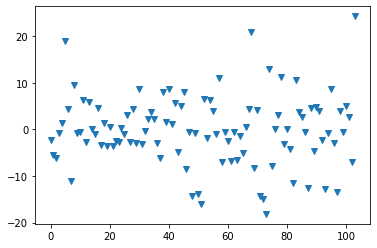

In [35]:
# alpha = 0.1 일때
plt.plot(ridge01.coef_, "v", label = "alpha=10")
plt.show()

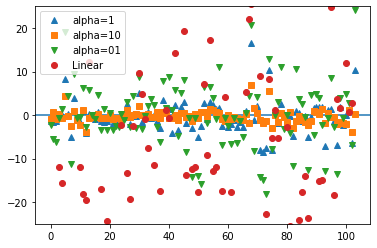

In [48]:
# alpha 값이 10일 때 조금 더 위축 됨을 볼 수 있음
# alpha 값이 0.1일 때 조금 더 분산 됨을 볼 수 있음
plt.plot(ridge.coef_, "^", label = "alpha=1")
plt.plot(ridge10.coef_, "s", label = "alpha=10")
plt.plot(ridge01.coef_, "v", label = "alpha=01")

plt.plot(lr.coef_, 'o', label = 'Linear')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()

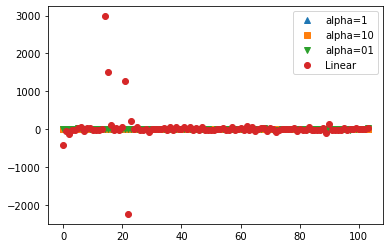

In [50]:
# xlim, ylim을 안 줬을때 해당 그래프가 나옴
plt.plot(ridge.coef_, "^", label = "alpha=1")
plt.plot(ridge10.coef_, "s", label = "alpha=10")
plt.plot(ridge01.coef_, "v", label = "alpha=01")

plt.plot(lr.coef_, 'o', label = 'Linear')
plt.legend()

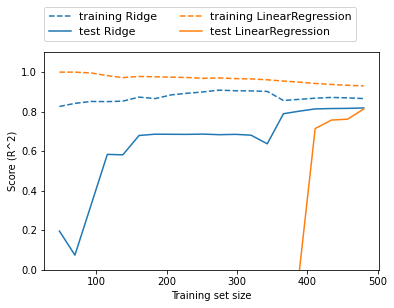

In [52]:
mglearn.plots.plot_ridge_n_samples()

In [54]:
# 라소
lasso = Lasso().fit(X_train, y_train)

In [57]:
lasso.score(X_train, y_train)

0.29323768991114607

In [59]:
lasso.score(X_test, y_test)

0.20937503255272294

In [71]:
# 104개중 4개만 0이 아니라더라 
import numpy as np
np.sum(lasso.coef_ != 0)

4

In [73]:
np.sum(lasso001.coef_ != 0)

33

In [74]:
np.sum(lasso00001.coef_ != 0) # 학습한 데이터가 많지만 과적합이 발생함을 알 수 있음 / 선형 회귀와 비슷함.

96

In [66]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)

In [68]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

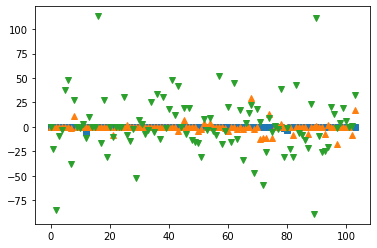

In [70]:
plt.plot(lasso.coef_, 's')    # 값이 안 튀어 학습에 제한이 됨을 알 수 있음
plt.plot(lasso001.coef_, '^') # 규제를 조금 풀어 이전 보다 많이 분산됨
plt.plot(lasso00001.coef_, 'v') # 선형 회귀와 비슷함.
plt.show()